<a href="https://colab.research.google.com/github/PhillipMas/Credit-Card-Routing-for-Online-Purchase-via-Predictive-Modelling/blob/main/Model_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!!pip install imbalanced-learn
!pip install shap

In [ ]:
import shap
#For data wrangling/analysis
import pandas as pd
import numpy as np
#For graphing visuals
import matplotlib.pyplot as plt
import seaborn as sns
#FOR DATA PREPROCESSING AND MODELLING
# For data preprocessing
from sklearn.preprocessing import StandardScaler, LabelBinarizer, OneHotEncoder, label_binarize
# For model selection and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC  #Support_Vector_Machine Classifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer  # For model evaluation metrics
from sklearn.metrics import precision_recall_curve, auc, roc_curve  # For precision-recall and ROC curve analysis
from sklearn.compose import ColumnTransformer  #transforms columns in a dataset
from sklearn.model_selection import learning_curve  #learning curves visuals

In [ ]:
# For handling imbalanced datasets
from imblearn.over_sampling import SMOTE  # For handling imbalanced datasets

In [ ]:
df = pd.read_excel('/content/PSP_Jan_Feb_2019.xlsx')
# Using shape to get the size
#rows, columns = df.shape
#print(f"Number of rows: {rows}, Number of columns: {columns}")
df.head(5)


,Unnamed: 0,tmsp,country,amount,success,PSP,3D_secured,card
0,0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners


In [ ]:
df = df.drop('Unnamed: 0', axis=1) #removes the redundant column
df.info() #get basic information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50410 entries, 0 to 50409
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tmsp        50410 non-null  datetime64[ns]
 1   country     50410 non-null  object        
 2   amount      50410 non-null  int64         
 3   success     50410 non-null  int64         
 4   PSP         50410 non-null  object        
 5   3D_secured  50410 non-null  int64         
 6   card        50410 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 2.7+ MB


In [ ]:
df.head()

,tmsp,country,amount,success,PSP,3D_secured,card
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners


In [ ]:
df.isna().sum()


tmsp          0
country       0
amount        0
success       0
PSP           0
3D_secured    0
card          0
dtype: int64

In [ ]:
# Print descriptive statistics for the 'amount' column
print(df['amount'].describe())

count    50410.000000
mean       202.395715
std         96.274730
min          6.000000
25%        133.000000
50%        201.000000
75%        269.000000
max        630.000000
Name: amount, dtype: float64


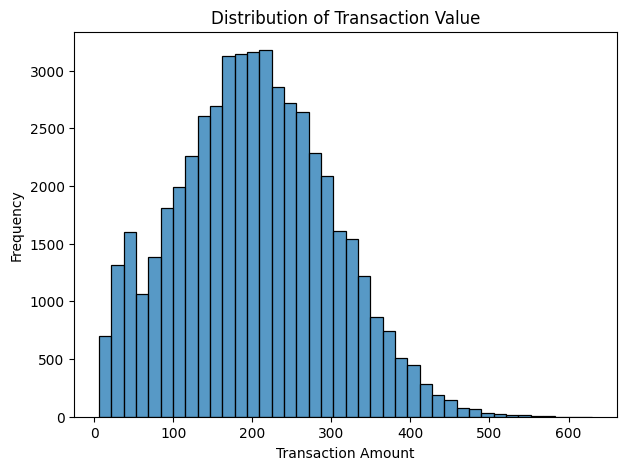

In [ ]:
# Visualization of transaction amount distribution
plt.figure(figsize=(7, 5))

# Plot a histogram with 30 bins and a kernel density estimate
sns.histplot(df['amount'], bins=40, kde=False)

# Set plot title and axis labels
plt.title('Distribution of Transaction Value')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

# Show the plot of transaction amount distribution
plt.show()

In [ ]:
# Print summary statistics for the 'success' column
print("Summary statistics for 'success' column:")
print(df['success'].value_counts())
print("Summary statistics for 'success' column in percentage:")
print((df['success'].value_counts()/len(df))*100)

Summary statistics for 'success' column:
success
0    40182
1    10228
Name: count, dtype: int64
Summary statistics for 'success' column in percentage:
success
0    79.710375
1    20.289625
Name: count, dtype: float64


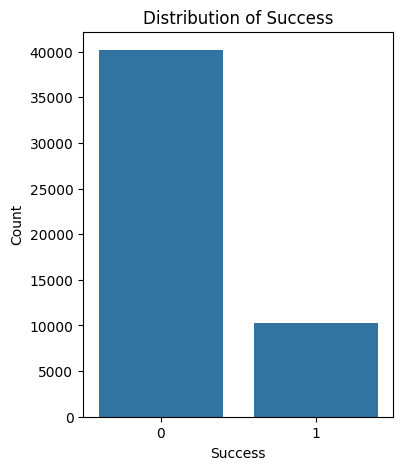

In [ ]:
# Visualization of the distribution of 'success' column
plt.figure(figsize=(4, 5))

# Create a countplot for the 'success' column
sns.countplot(x='success', data=df)

# Set plot title and axis labels
plt.title('Distribution of Success')
plt.xlabel('Success')
plt.ylabel('Count')

# Show the plot distribution of success
plt.show()

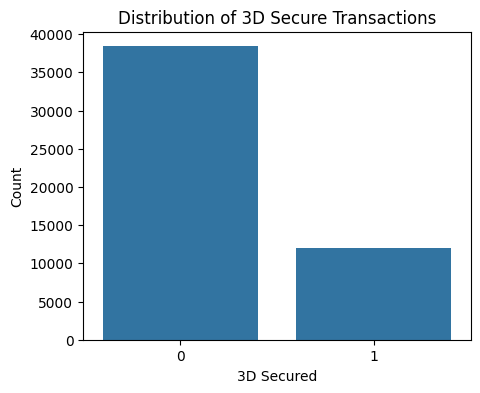

In [ ]:
# Visualization of the distribution of '3D_secured' column
plt.figure(figsize=(5, 4))

# Create a countplot for the '3D_secured' column
sns.countplot(x='3D_secured', data=df)

# Set plot title and axis labels
plt.title('Distribution of 3D Secure Transactions')
plt.xlabel('3D Secured')
plt.ylabel('Count')

# Show the plot distribution of 3D_secured
plt.show()



Summary statistics for 'country' column:
country
Germany        59.974211
Switzerland    20.507836
Austria        19.517953
Name: count, dtype: float64


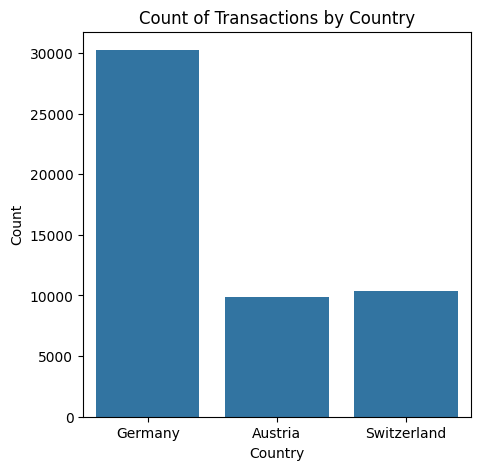

In [ ]:
# Print summary statistics for the 'country' column
print("\nSummary statistics for 'country' column:")
#print(df['country'].value_counts())
print(df['country'].value_counts()/ len(df) * 100)
# Visualization of the count of transactions by country
plt.figure(figsize=(5, 5))

# Create a countplot for the 'country' column
sns.countplot(x='country', data=df)

# Set plot title and axis labels
plt.title('Count of Transactions by Country')
plt.xlabel('Country')
plt.ylabel('Count')

# Show the plot count of transactions by country
plt.show()

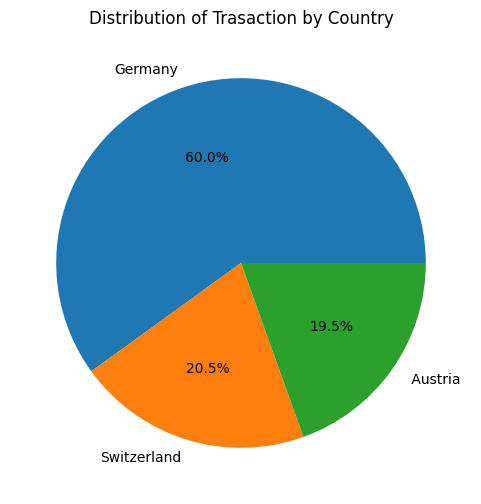

In [ ]:
plt.figure(figsize=(6, 6))  # Optional: Set the figure size
labels=['Germany', 'Switzerland',' Austria' ]
plt.pie( df['country'].value_counts(),labels=labels,autopct='%.1f%%')
plt.title('Distribution of Trasaction by Country')
plt.show()


Summary statistics for 'PSP' column:
PSP
UK_Card       52.487602
Simplecard    24.689546
Moneycard     16.459036
Goldcard       6.363817
Name: count, dtype: float64


<ipython-input-104-e05b8ceabbc0>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PSP', data=df,palette=color,legend=False)


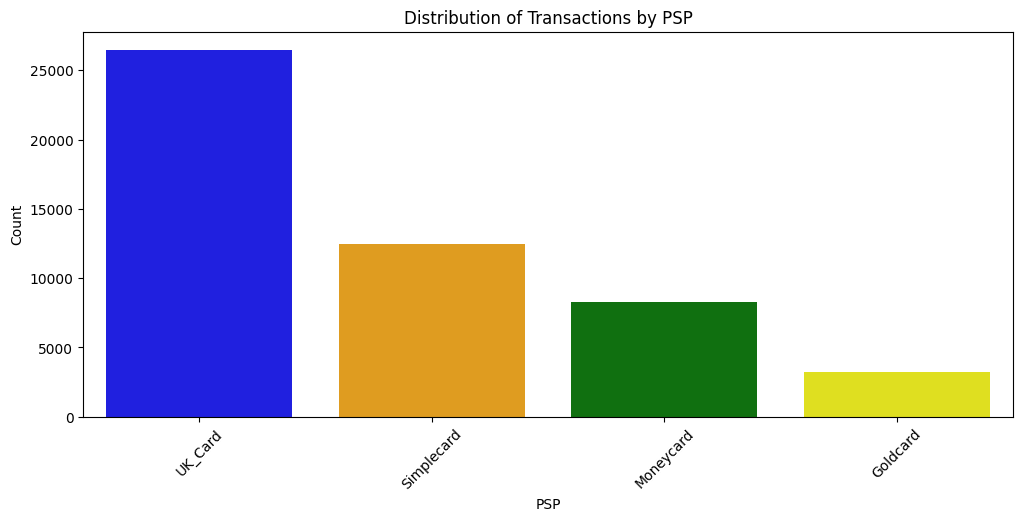

In [ ]:
# Print summary statistics for the 'PSP' column
print("\nSummary statistics for 'PSP' column:")
#print(df['PSP'].value_counts())
print(df['PSP'].value_counts()/ len(df) * 100)
 #Visualization of the distribution of transactions by PSP
plt.figure(figsize=(12, 5))

# Create a countplot for the 'PSP' column

color = ['blue','orange','green','yellow']

sns.countplot(x='PSP', data=df,palette=color,legend=False)

# Set plot title, axis labels, and rotate x-axis labels for better readability
plt.title('Distribution of Transactions by PSP')
plt.xlabel('PSP')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show the plot distribution of transactions by PSP
plt.show()

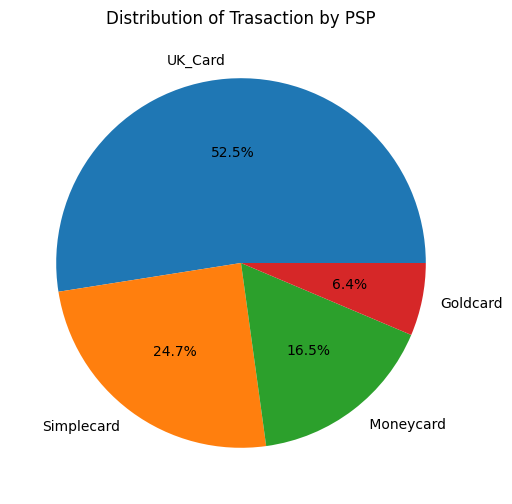

In [ ]:
plt.figure(figsize=(6, 6))  # Optional: Set the figure size
labels=['UK_Card', 'Simplecard',' Moneycard', 'Goldcard' ]
plt.pie( df['PSP'].value_counts(),labels=labels, autopct='%.1f%%')
plt.title('Distribution of Trasaction by PSP')
plt.show()


Summary statistics for 'card' column:
card
Master    29002
Visa      11640
Diners     9768
Name: count, dtype: int64

Summary statistics for 'card' column (%):
card
Master    57.532236
Visa      23.090657
Diners    19.377108
Name: count, dtype: float64


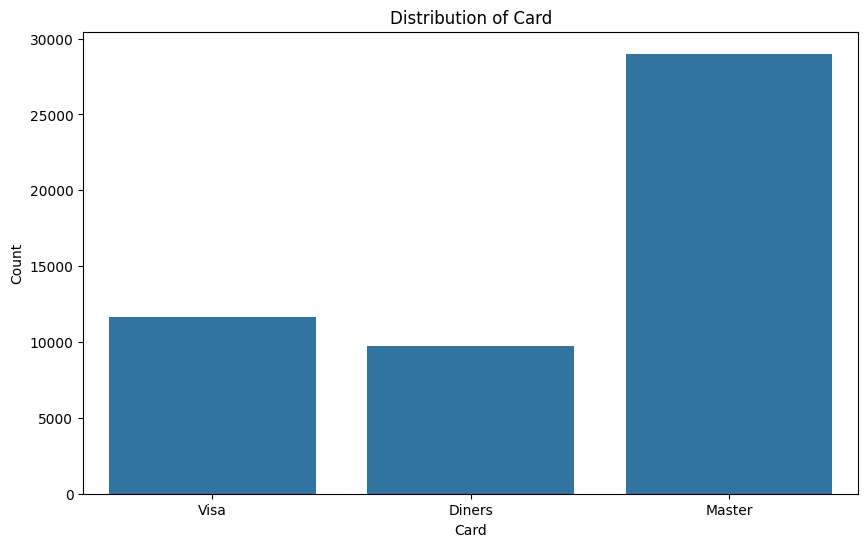

In [ ]:
# Print summary statistics for the 'card' column
print("\nSummary statistics for 'card' column:")
print(df['card'].value_counts())
print("\nSummary statistics for 'card' column (%):")
print(df['card'].value_counts()/ len(df) * 100)

# Visualization of the distribution of cards
plt.figure(figsize=(10, 6))

# Create a countplot for the 'card' column
sns.countplot(x='card', data=df)

# Set plot title and axis labels
plt.title('Distribution of Card')
plt.xlabel('Card')
plt.ylabel('Count')

# Show the plot distribution of cards
plt.show()

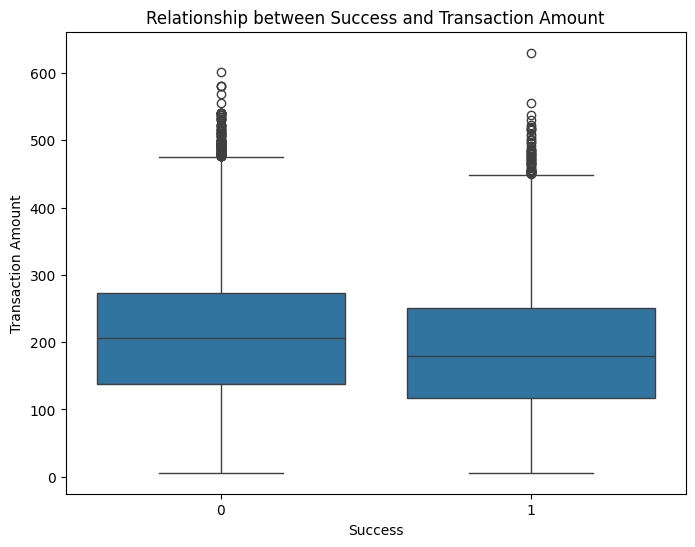

In [ ]:
# Visualization of the relationship between success and transaction amount using a boxplot
plt.figure(figsize=(8, 6))

# Create a boxplot with 'success' on the x-axis and 'amount' on the y-axis
sns.boxplot(x='success', y='amount', data=df)

# Set plot title and axis labels
plt.title('Relationship between Success and Transaction Amount')
plt.xlabel('Success')
plt.ylabel('Transaction Amount')

# Show the plot relationship between success and transaction amount
plt.show()


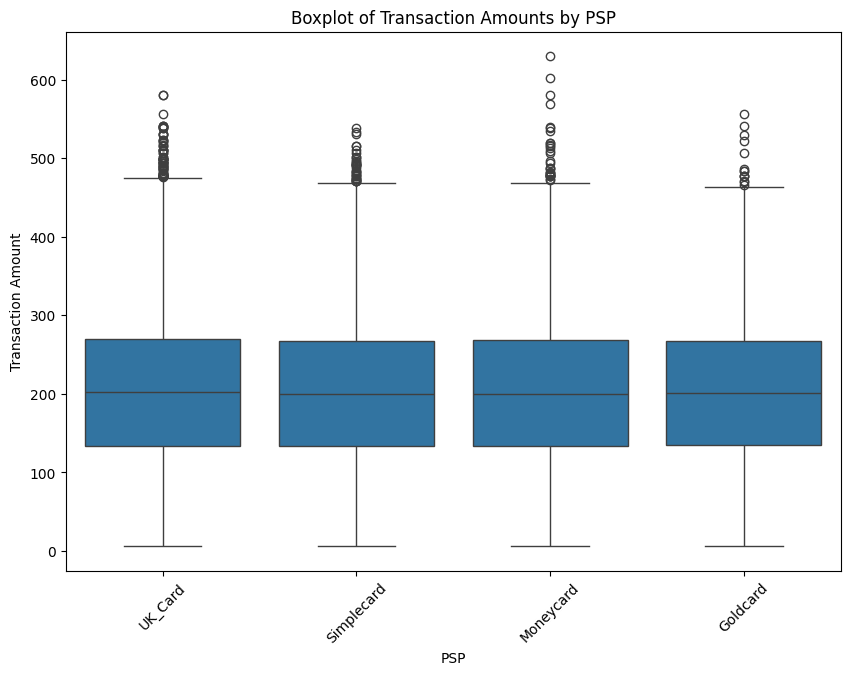

In [ ]:
 #Create a boxplot to visualize transaction amounts by country
plt.figure(figsize=(10, 7))

# Use a boxplot with 'country' on the x-axis and 'amount' on the y-axis
sns.boxplot(x='PSP', y='amount', data=df)

# Set plot title, axis labels, and rotate x-axis labels for better readability
plt.title('Boxplot of Transaction Amounts by PSP')
plt.xlabel('PSP')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)

# Show the plot
plt.show()

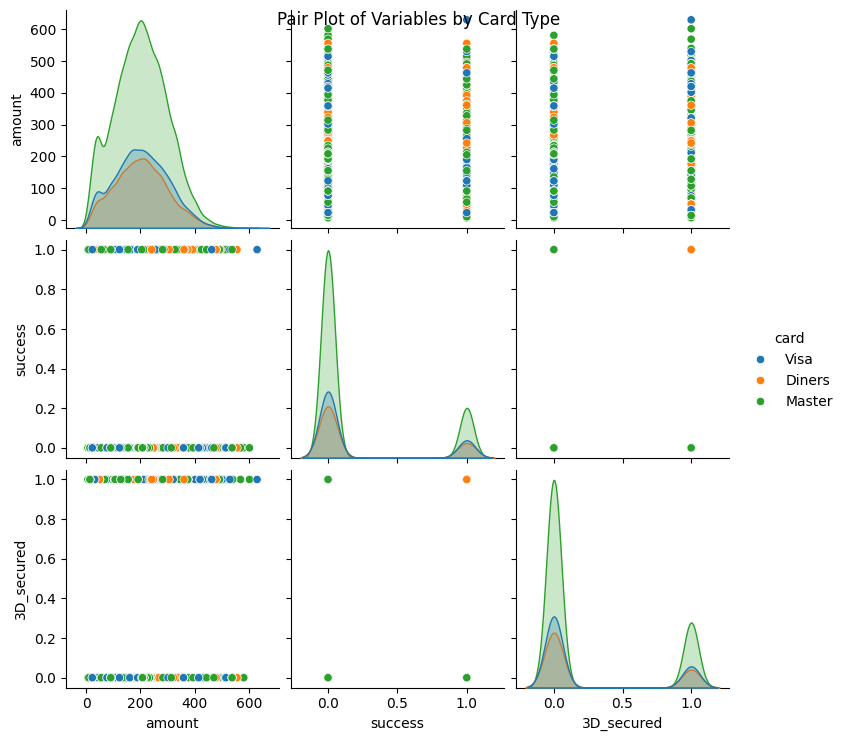

In [ ]:
 #Create a pair plot for selected variables: 'amount', 'success', and '3D_secured', with hue based on 'card' column
sns.pairplot(df,   kind="scatter",  hue='card', vars=['amount', 'success', '3D_secured'])

# Set the overall title for the pair plot
plt.suptitle('Pair Plot of Variables by Card Type')

# Show the plot
plt.show()

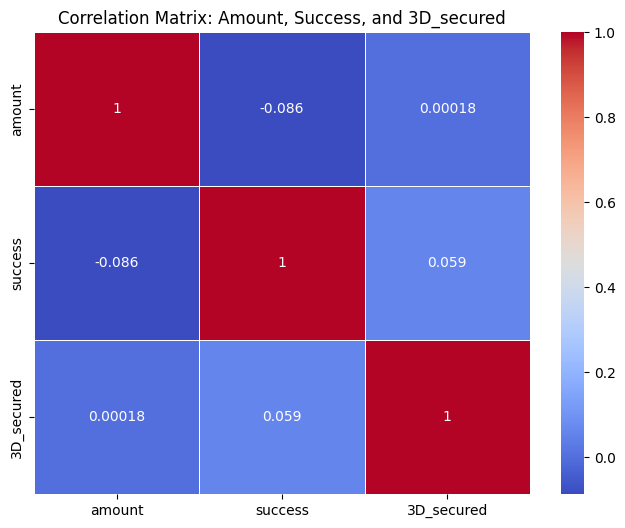

In [ ]:
# Select relevant columns for correlation analysis
selected_columns = ['amount', 'success', '3D_secured']

# Calculate the correlation matrix
correlation_matrix = df[selected_columns].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Set plot title
plt.title('Correlation Matrix: Amount, Success, and 3D_secured')

# Show the plot
plt.show()


<ipython-input-111-74de530741f0>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='card', y='success', data=df, ci=None)


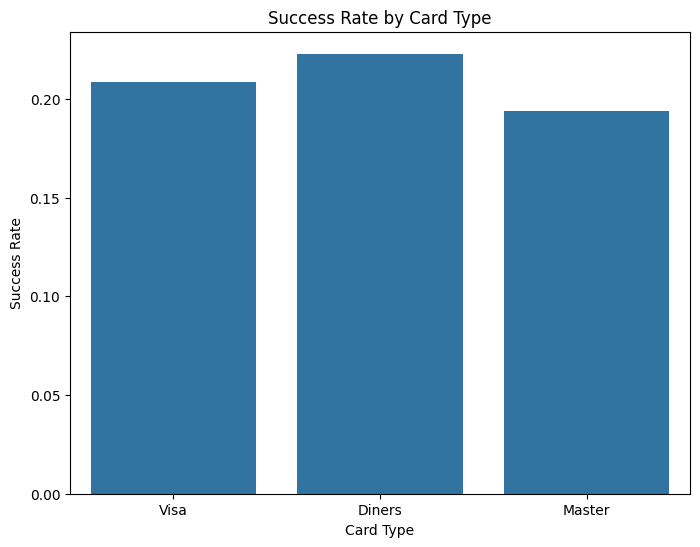

In [ ]:
# Create a bar plot to visualize success rate by card type
plt.figure(figsize=(8, 6))

# Use a bar plot with 'card' on the x-axis, 'success' on the y-axis, and no confidence interval (ci=None)
sns.barplot(x='card', y='success', data=df, ci=None)

# Set plot title and axis labels
plt.title('Success Rate by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Success Rate')

# Show the plot
plt.show()


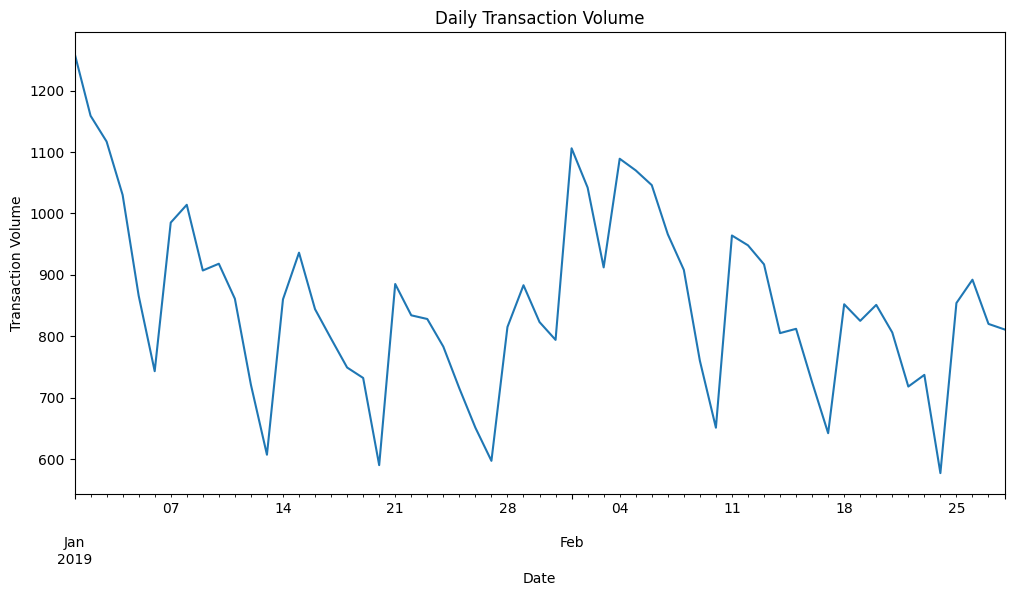

In [ ]:
#Convert 'tmsp' column to datetime format
df['tmsp'] = pd.to_datetime(df['tmsp'])

#Set 'tmsp' as the index of the DataFrame
df.set_index('tmsp', inplace=True)

#Resample the data by day and plot the daily transaction volume
df.resample('D').size().plot(title='Daily Transaction Volume', figsize=(12, 6))

#Set x-axis and y-axis labels
plt.xlabel('Date')
plt.ylabel('Transaction Volume')

#Show the plot
plt.show()

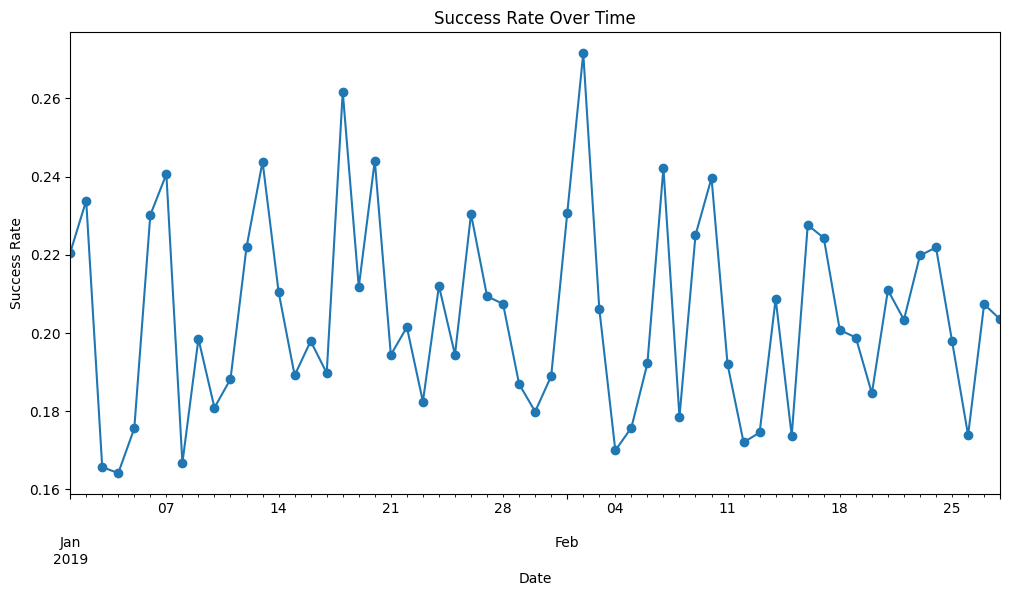

In [ ]:
 #Create a figure
plt.figure(figsize=(12, 6))

# Calculate the daily success rate and plot it over time
success_rate_by_date = df.resample('D')['success'].mean()

# Use a line plot with markers to visualize the success rate over time
success_rate_by_date.plot(marker='o', linestyle='-')

# Set plot title, x-axis label, y-axis label
plt.title('Success Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Success Rate')

# Show the plot
plt.show()

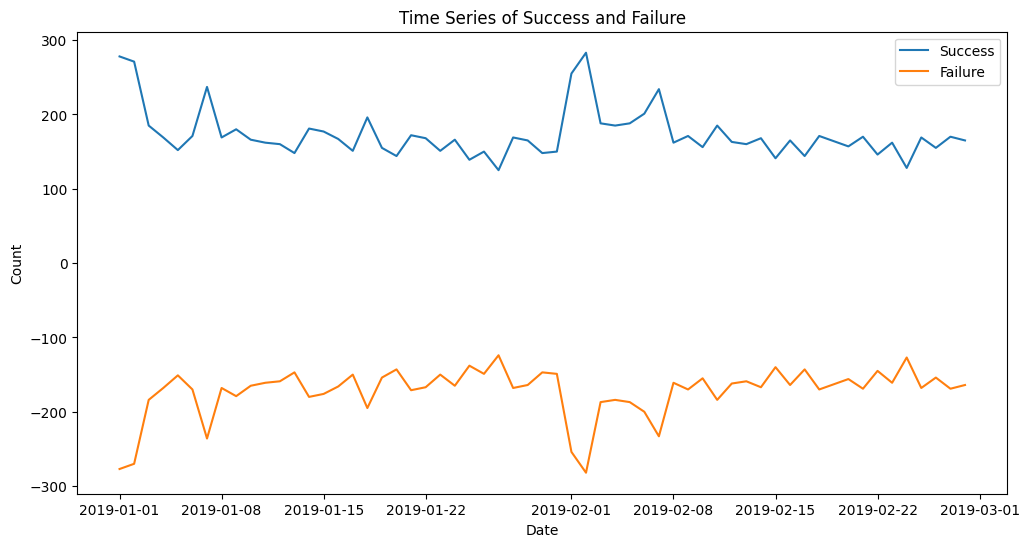

In [ ]:
# Resample the DataFrame by day and calculate the sum for each day
df_resampled = df.resample('D').sum()

# Create a line plot for success and failure over time
plt.figure(figsize=(12, 6))

# Use lineplot to plot 'success' and 'failure' against the resampled dates
sns.lineplot(x=df_resampled.index, y='success', data=df_resampled, label='Success')
sns.lineplot(x=df_resampled.index, y=1 - df_resampled['success'], label='Failure')

# Set plot title, x-axis label, y-axis label, and add legend
plt.title('Time Series of Success and Failure')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()

# Show the plot
plt.show()


In [ ]:
# Reset the index of the DataFrame
df.reset_index(inplace=True)

# Define dictionaries for mapping success and failure transaction fees based on card type
success_fee_mapping = {
    'Moneycard': 5,
    'Goldcard': 10,
    'UK_Card': 3,
    'Simplecard': 1
}
failed_fee_mapping = {
    'Moneycard': 2,
    'Goldcard': 5,
    'UK_Card': 1,
    'Simplecard': 0.5
}

# Create a new column 'transaction_fee' based on success or failure, using np.where
df['transaction_fee'] = np.where(df['success'] == 1, df['PSP'].map(success_fee_mapping), df['PSP'].map(failed_fee_mapping))

# Print the first few rows of the updated DataFrame
df.head()


,tmsp,country,amount,success,PSP,3D_secured,card,transaction_fee
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa,1.0
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa,3.0
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners,1.0
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners,3.0
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners,0.5


In [ ]:
# Convert 'tmsp' column to datetime format
df['tmsp'] = pd.to_datetime(df['tmsp'])

# Add 'day_of_week' column with numerical mapping for days of the week
df['day_of_week'] = df['tmsp'].dt.dayofweek

# Add 'minute_of_day' column
df['minute_of_day'] = df['tmsp'].dt.hour * 60 + df['tmsp'].dt.minute

# Print the first few rows of the updated DataFrame
(df.head())

,tmsp,country,amount,success,PSP,3D_secured,card,transaction_fee,day_of_week,minute_of_day
0,2019-01-01 00:01:11,Germany,89,0,UK_Card,0,Visa,1.0,1,1
1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa,3.0,1,1
2,2019-01-01 00:02:49,Germany,238,0,UK_Card,1,Diners,1.0,1,2
3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners,3.0,1,3
4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners,0.5,1,4


In [ ]:
# Sort the DataFrame by 'country', 'amount', 'day_of_week', 'minute_of_day'
df.sort_values(by=['country', 'amount', 'minute_of_day'], inplace=True)

# Create a new column 'payment_attempts' and initialize it with 1
df['payment_attempts'] = 1

# Identify rows where consecutive attempts have the same 'country', 'amount', 'day_of_week', and 'minute_of_day'
# Increment the 'payment_attempts' for those rows
df['payment_attempts'] = df.groupby(['country', 'amount', 'minute_of_day']).cumcount() + 1

# Reset the DataFrame index
df.reset_index(drop=True, inplace=True)

# Display the updated DataFrame
(df.head())


,tmsp,country,amount,success,PSP,3D_secured,card,transaction_fee,day_of_week,minute_of_day,payment_attempts
0,2019-01-10 03:49:12,Austria,6,0,Moneycard,0,Diners,2.0,3,229,1
1,2019-01-10 03:49:37,Austria,6,0,Simplecard,0,Diners,0.5,3,229,2
2,2019-02-08 05:02:33,Austria,6,0,UK_Card,0,Diners,1.0,4,302,1
3,2019-02-08 05:02:37,Austria,6,0,UK_Card,0,Diners,1.0,4,302,2
4,2019-02-08 05:02:39,Austria,6,0,Simplecard,0,Diners,0.5,4,302,3


                   count      mean       std  min  25%  50%  75%   max
transaction_fee  50410.0  1.756477  1.814051  0.5  1.0  1.0  2.0  10.0


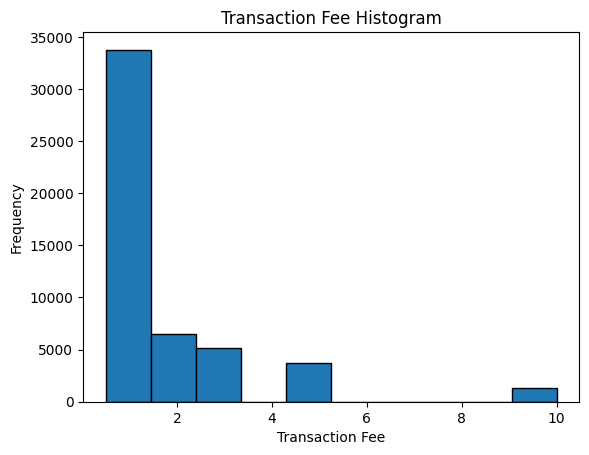

In [ ]:
# Select numeric columns for summary statistics
numeric_columns = ['transaction_fee']

# Calculate descriptive statistics for numeric columns
numeric_summary = df[numeric_columns].describe()

# Transpose the summary for better readability
Transaction_Fee_Summary = numeric_summary.transpose()

# Print the transposed summary
print(Transaction_Fee_Summary)

# Create a histogram to visualize the distribution of transaction fees
plt.hist(df['transaction_fee'], bins=10, edgecolor='black')

# Set plot title, x-axis label, y-axis label
plt.title('Transaction Fee Histogram')
plt.xlabel('Transaction Fee')
plt.ylabel('Frequency')

# Show the plot
plt.show()

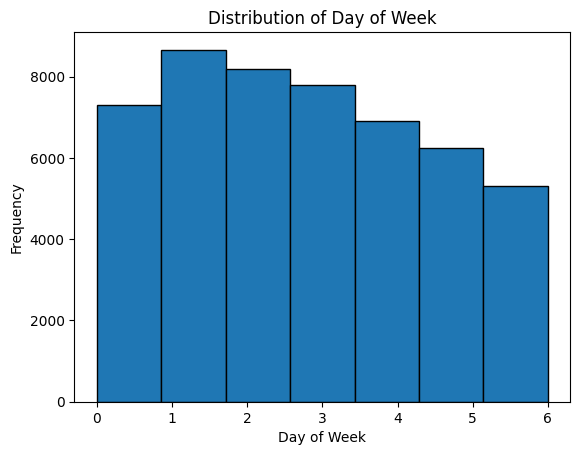

,tmsp,country,amount,success,PSP,3D_secured,card,transaction_fee,day_of_week,minute_of_day,payment_attempts
0,2019-01-10 03:49:12,Austria,6,0,Moneycard,0,Diners,2.0,3,229,1
1,2019-01-10 03:49:37,Austria,6,0,Simplecard,0,Diners,0.5,3,229,2
2,2019-02-08 05:02:33,Austria,6,0,UK_Card,0,Diners,1.0,4,302,1
3,2019-02-08 05:02:37,Austria,6,0,UK_Card,0,Diners,1.0,4,302,2
4,2019-02-08 05:02:39,Austria,6,0,Simplecard,0,Diners,0.5,4,302,3


In [ ]:
# Create a histogram to visualize the distribution of 'day_of_week'
plt.hist(df['day_of_week'], bins=7, edgecolor='black')

# Set x-axis label, y-axis label, and plot title
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.title('Distribution of Day of Week')

# Show the plot
plt.show()
df.head()

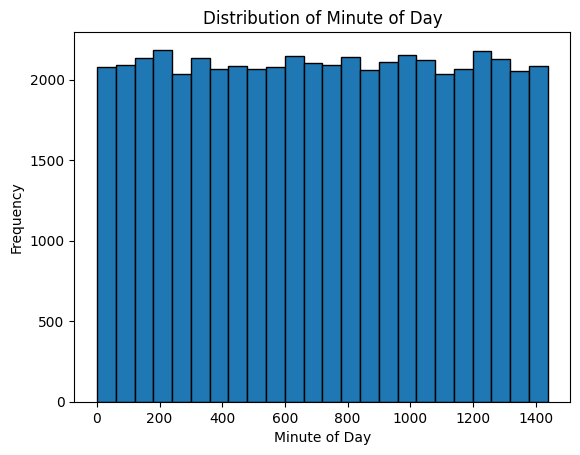

In [ ]:
# Create a histogram to visualize the distribution of 'minute_of_day'
plt.hist(df['minute_of_day'], bins=24, edgecolor='black')

# Set x-axis label, y-axis label, and plot title
plt.xlabel('Minute of Day')
plt.ylabel('Frequency')
plt.title('Distribution of Minute of Day')

# Show the plot
plt.show()

payment_attempts
1    37227
2    10463
3     2228
4      412
5       67
6       10
7        3
Name: count, dtype: int64


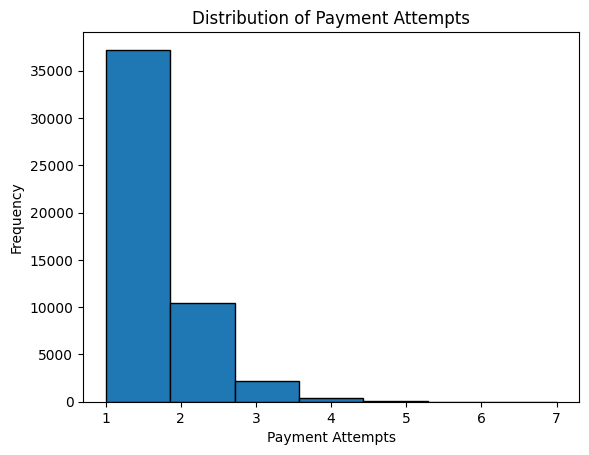

In [ ]:
# Count the occurrences of each value in the 'payment_attempts' column and sort by index
attempt_counts = df['payment_attempts'].value_counts().sort_index()

# Print the count of payment attempts for each value
print(attempt_counts)

# Create a histogram to visualize the distribution of 'payment_attempts'
plt.hist(df['payment_attempts'], bins=7, edgecolor='black')

# Set x-axis label, y-axis label, and plot title
plt.xlabel('Payment Attempts')
plt.ylabel('Frequency')
plt.title('Distribution of Payment Attempts')

# Show the plot
plt.show()



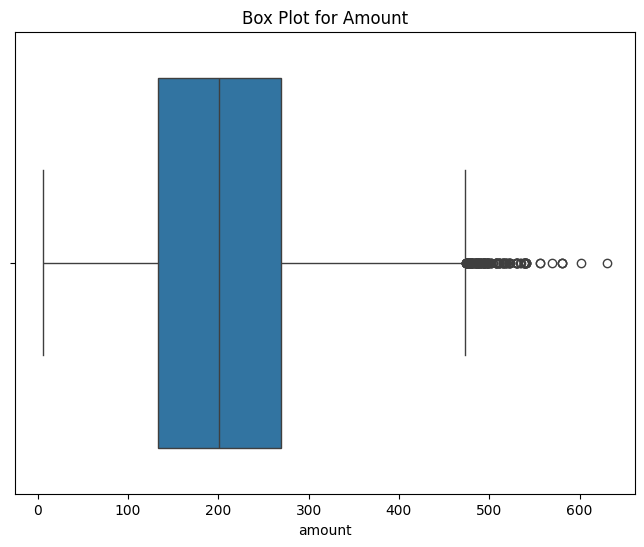

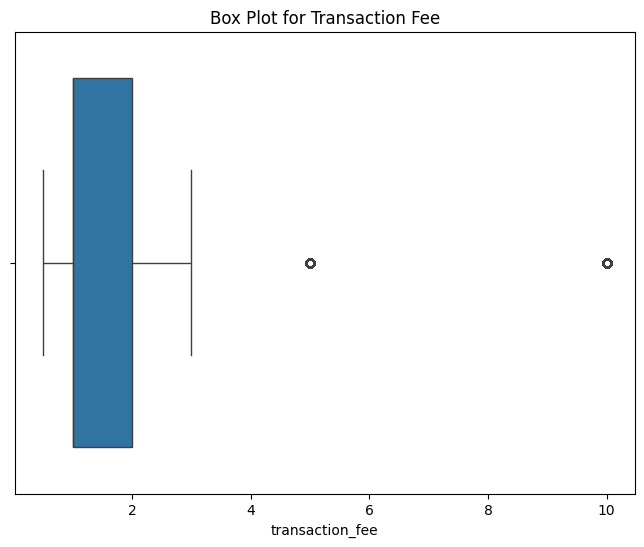

In [ ]:
# Box plot for 'amount'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['amount'])
plt.title('Box Plot for Amount')
plt.show()

# Box plot for 'transaction_fee'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['transaction_fee'])
plt.title('Box Plot for Transaction Fee')
plt.show()


In [ ]:
# Set a threshold for identifying rare categories
threshold = 10

# Identify rare categories for 'country', 'PSP', and 'card'
rare_country = df['country'].value_counts()[df['country'].value_counts() < threshold].index
rare_PSP = df['PSP'].value_counts()[df['PSP'].value_counts() < threshold].index
rare_card = df['card'].value_counts()[df['card'].value_counts() < threshold].index

# Print the rare categories
print("Rare countries:", rare_country)
print("Rare PSPs:", rare_PSP)
print("Rare cards:", rare_card)

Rare countries: Index([], dtype='object', name='country')
Rare PSPs: Index([], dtype='object', name='PSP')
Rare cards: Index([], dtype='object', name='card')


In [ ]:
df.head()

,tmsp,country,amount,success,PSP,3D_secured,card,transaction_fee,day_of_week,minute_of_day,payment_attempts
0,2019-01-10 03:49:12,Austria,6,0,Moneycard,0,Diners,2.0,3,229,1
1,2019-01-10 03:49:37,Austria,6,0,Simplecard,0,Diners,0.5,3,229,2
2,2019-02-08 05:02:33,Austria,6,0,UK_Card,0,Diners,1.0,4,302,1
3,2019-02-08 05:02:37,Austria,6,0,UK_Card,0,Diners,1.0,4,302,2
4,2019-02-08 05:02:39,Austria,6,0,Simplecard,0,Diners,0.5,4,302,3


In [ ]:
# Drop the 'tmsp' column
df.drop('tmsp', axis=1, inplace=True)
print(df.head())

   country  amount  success         PSP  3D_secured    card  transaction_fee  \
0  Austria       6        0   Moneycard           0  Diners              2.0   
1  Austria       6        0  Simplecard           0  Diners              0.5   
2  Austria       6        0     UK_Card           0  Diners              1.0   
3  Austria       6        0     UK_Card           0  Diners              1.0   
4  Austria       6        0  Simplecard           0  Diners              0.5   

   day_of_week  minute_of_day  payment_attempts  
0            3            229                 1  
1            3            229                 2  
2            4            302                 1  
3            4            302                 2  
4            4            302                 3  


In [ ]:
df.head()

,country,amount,success,PSP,3D_secured,card,transaction_fee,day_of_week,minute_of_day,payment_attempts
0,Austria,6,0,Moneycard,0,Diners,2.0,3,229,1
1,Austria,6,0,Simplecard,0,Diners,0.5,3,229,2
2,Austria,6,0,UK_Card,0,Diners,1.0,4,302,1
3,Austria,6,0,UK_Card,0,Diners,1.0,4,302,2
4,Austria,6,0,Simplecard,0,Diners,0.5,4,302,3


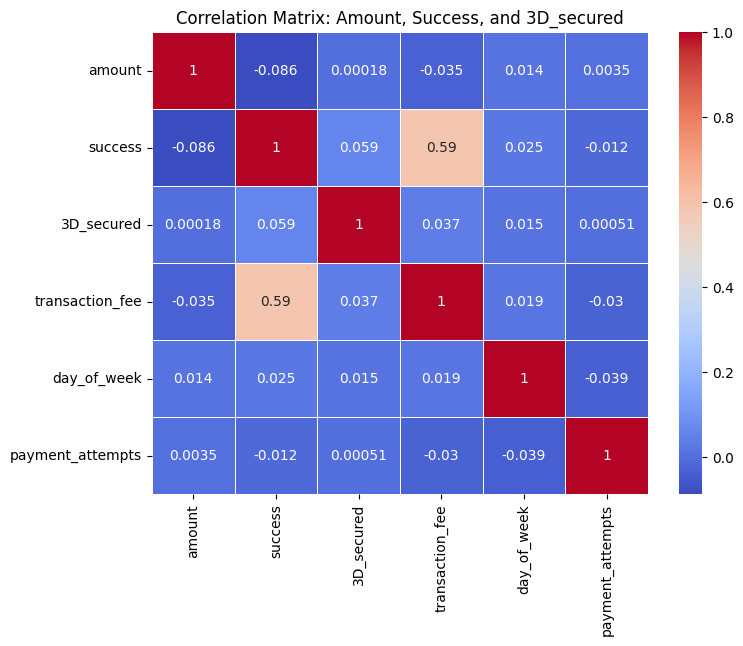

In [ ]:
# Select relevant columns for correlation analysis
selected_columns = ['amount', 'success', '3D_secured','transaction_fee','day_of_week','payment_attempts']

# Calculate the correlation matrix
correlation_matrix = df[selected_columns].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Set plot title
plt.title('Correlation Matrix: Amount, Success, and 3D_secured')

# Show the plot
plt.show()

In [ ]:
# Create a copy of the DataFrame
df_1 = df.copy()

# Drop the 'transaction_fee' column from the copied DataFrame
df_1 = df_1.drop('transaction_fee', axis=1)

# Print the modified DataFrame without the 'transaction_fee' column
df_1.tail()


,country,amount,success,PSP,3D_secured,card,day_of_week,minute_of_day,payment_attempts
50405,Switzerland,499,0,UK_Card,0,Master,3,247,1
50406,Switzerland,499,0,UK_Card,0,Master,3,247,2
50407,Switzerland,499,0,UK_Card,0,Master,3,248,1
50408,Switzerland,499,0,UK_Card,0,Master,3,248,2
50409,Switzerland,499,0,UK_Card,0,Master,3,249,1


# **Building Baseline Model 1**

In [ ]:

# Building Baseline Model 1
def evaluate_model(model, X, y, set_name):
    # Make predictions
    y_pred = model.predict(X)

    # Calculate performance metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_pred)
    conf_matrix = confusion_matrix(y, y_pred)

    # Print the performance metrics with set name
    print(f'Model Performance on the {set_name}:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-Score: {f1:.4f}')
    print(f'AUC-ROC: {roc_auc:.4f}')
    print('Confusion Matrix:')
    print(conf_matrix)
    print('\n')

In [ ]:

# Encode categorical variables using one-hot encoding
df_1_encoded = pd.get_dummies(df_1, columns=['country', 'PSP', 'card'])
df_1_encoded.head()

,amount,success,3D_secured,day_of_week,minute_of_day,payment_attempts,country_Austria,country_Germany,country_Switzerland,PSP_Goldcard,PSP_Moneycard,PSP_Simplecard,PSP_UK_Card,card_Diners,card_Master,card_Visa
0,6,0,0,3,229,1,True,False,False,False,True,False,False,True,False,False
1,6,0,0,3,229,2,True,False,False,False,False,True,False,True,False,False
2,6,0,0,4,302,1,True,False,False,False,False,False,True,True,False,False
3,6,0,0,4,302,2,True,False,False,False,False,False,True,True,False,False
4,6,0,0,4,302,3,True,False,False,False,False,True,False,True,False,False


In [ ]:
 #Split the dataset into train, validation, and test sets
X_original = df_1_encoded.drop('success', axis=1)
y_original = df_1_encoded['success']
X_train_original, X_temp_original, y_train_original, y_temp_original = train_test_split(X_original, y_original, test_size=0.2, random_state=42)
X_validation_original, X_test_original, y_validation_original, y_test_original = train_test_split(X_temp_original, y_temp_original, test_size=0.5, random_state=42)

In [ ]:

# Create and train a baseline KNN model
baseline_knn_model = KNeighborsClassifier()
baseline_knn_model.fit(X_train_original, y_train_original)

# Evaluate the model on the validation set
evaluate_model(baseline_knn_model, X_validation_original, y_validation_original, "validation set")

# Evaluate the model on the test set
evaluate_model(baseline_knn_model, X_test_original, y_test_original, "test set")


Model Performance on the validation set:
Accuracy: 0.7713
Precision: 0.2525
Recall: 0.0746
F1-Score: 0.1151
AUC-ROC: 0.5098
Confusion Matrix:
[[3813  222]
 [ 931   75]]


Model Performance on the test set:
Accuracy: 0.7590
Precision: 0.2137
Recall: 0.0526
F1-Score: 0.0844
AUC-ROC: 0.5004
Confusion Matrix:
[[3770  206]
 [1009   56]]




In [ ]:
 # Encode categorical variables using one-hot encoding
df_1 = pd.get_dummies(df_1, columns=['country', 'PSP', 'card'])

# Print the DataFrame after one-hot encoding
df_1.head()


,amount,success,3D_secured,day_of_week,minute_of_day,payment_attempts,country_Austria,country_Germany,country_Switzerland,PSP_Goldcard,PSP_Moneycard,PSP_Simplecard,PSP_UK_Card,card_Diners,card_Master,card_Visa
0,6,0,0,3,229,1,True,False,False,False,True,False,False,True,False,False
1,6,0,0,3,229,2,True,False,False,False,False,True,False,True,False,False
2,6,0,0,4,302,1,True,False,False,False,False,False,True,True,False,False
3,6,0,0,4,302,2,True,False,False,False,False,False,True,True,False,False
4,6,0,0,4,302,3,True,False,False,False,False,True,False,True,False,False


In [ ]:

# Drop the target variable 'success' from the features
X = df_1.drop('success', axis=1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features using StandardScaler
X_scaled = scaler.fit_transform(X)

# Create a DataFrame with scaled features and include the 'success' column
df_1_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_1_scaled['success'] = df_1['success']
# Print the DataFrame with scaled features
df_1_scaled.head()

,amount,3D_secured,day_of_week,minute_of_day,payment_attempts,country_Austria,country_Germany,country_Switzerland,PSP_Goldcard,PSP_Moneycard,PSP_Simplecard,PSP_UK_Card,card_Diners,card_Master,card_Visa,success
0,-2.039971,-0.55928,0.125262,-1.180246,-0.531209,2.030637,-1.224087,-0.507923,-0.260698,2.252929,-0.57257,-1.051054,2.039786,-1.163927,-0.547934,0
1,-2.039971,-0.55928,0.125262,-1.180246,1.092601,2.030637,-1.224087,-0.507923,-0.260698,-0.443867,1.74651,-1.051054,2.039786,-1.163927,-0.547934,0
2,-2.039971,-0.55928,0.646728,-1.004572,-0.531209,2.030637,-1.224087,-0.507923,-0.260698,-0.443867,-0.57257,0.951426,2.039786,-1.163927,-0.547934,0
3,-2.039971,-0.55928,0.646728,-1.004572,1.092601,2.030637,-1.224087,-0.507923,-0.260698,-0.443867,-0.57257,0.951426,2.039786,-1.163927,-0.547934,0
4,-2.039971,-0.55928,0.646728,-1.004572,2.716410,2.030637,-1.224087,-0.507923,-0.260698,-0.443867,1.74651,-1.051054,2.039786,-1.163927,-0.547934,0


To balancethe data we use smote to oversample and add the minority class

In [ ]:

X_smote = df_1_scaled.drop('success', axis=1)
y_smote = df_1_scaled['success']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_smote, y_smote)

# Create a new DataFrame with the resampled features and the target variable
df_1_resampled = pd.DataFrame(X_resampled, columns=X_smote.columns)
df_1_resampled['success'] = y_resampled

# Display the updated DataFrame with SMOTE
df_1_resampled.head()




,amount,3D_secured,day_of_week,minute_of_day,payment_attempts,country_Austria,country_Germany,country_Switzerland,PSP_Goldcard,PSP_Moneycard,PSP_Simplecard,PSP_UK_Card,card_Diners,card_Master,card_Visa,success
0,-2.039971,-0.55928,0.125262,-1.180246,-0.531209,2.030637,-1.224087,-0.507923,-0.260698,2.252929,-0.57257,-1.051054,2.039786,-1.163927,-0.547934,0
1,-2.039971,-0.55928,0.125262,-1.180246,1.092601,2.030637,-1.224087,-0.507923,-0.260698,-0.443867,1.74651,-1.051054,2.039786,-1.163927,-0.547934,0
2,-2.039971,-0.55928,0.646728,-1.004572,-0.531209,2.030637,-1.224087,-0.507923,-0.260698,-0.443867,-0.57257,0.951426,2.039786,-1.163927,-0.547934,0
3,-2.039971,-0.55928,0.646728,-1.004572,1.092601,2.030637,-1.224087,-0.507923,-0.260698,-0.443867,-0.57257,0.951426,2.039786,-1.163927,-0.547934,0
4,-2.039971,-0.55928,0.646728,-1.004572,2.716410,2.030637,-1.224087,-0.507923,-0.260698,-0.443867,1.74651,-1.051054,2.039786,-1.163927,-0.547934,0


**Development of Model 1**

In [ ]:

# Split the resampled dataset into features (X_1) and target variable (y_1)
X_1 = df_1_resampled.drop('success', axis=1)
y_1 = df_1_resampled['success']

# Split the dataset into train, validation, and test sets
X_train_1, X_temp, y_train_1, y_temp = train_test_split(X_1, y_1, test_size=0.2, random_state=42)
X_valid_1, X_test_1, y_valid_1, y_test_1 = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize a StandardScaler and scale the features for training, validation, and test sets
scaler = StandardScaler()
X_train_scaled_1 = scaler.fit_transform(X_train_1)
X_valid_scaled_1 = scaler.transform(X_valid_1)
X_test_scaled_1 = scaler.transform(X_test_1)



In [ ]:
# Create and train Logistic Regression model
logreg_model_1 = LogisticRegression(random_state=42)
logreg_model_1.fit(X_train_scaled_1, y_train_1)



LogisticRegression(random_state=42)

In [ ]:

# Create and train Support Vector Machine (SVM) model
#svm_model_1 = SVC()
#svm_model_1.fit(X_train_scaled_1, y_train_1)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Create a Gradient Boosting classifier
GBoost_1 = GradientBoostingClassifier()
GBoost_1.fit(X_train_scaled_1, y_train_1)

GradientBoostingClassifier()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create a Decision Tree classifier
Tree_1 = DecisionTreeClassifier()
Tree_1.fit(X_train_scaled_1, y_train_1)

DecisionTreeClassifier()

In [ ]:
# Create and train Random Forest model
rf_model_1 = RandomForestClassifier(random_state=42)
rf_model_1.fit(X_train_scaled_1, y_train_1)


RandomForestClassifier(random_state=42)

In [ ]:
# Define a function to evaluate the performance of a model
def evaluate_model(model, X_scaled, y, set_name):
    y_pred = model.predict(X_scaled)
    y_pred_proba = model.predict_proba(X_scaled)[:, 1]

    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_pred_proba)
    accuracy = accuracy_score(y, y_pred)
    conf_matrix = confusion_matrix(y, y_pred)

    print(f'Model Performance on {set_name} set - {type(model).__name__}:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-Score: {f1:.4f}')
    print(f'AUC-ROC: {roc_auc:.4f}')
    print('Confusion Matrix:')
    print(conf_matrix)
    print('\n')

# Evaluate the models on the validation set
evaluate_model(logreg_model_1, X_valid_scaled_1, y_valid_1, set_name="Validation")
evaluate_model(rf_model_1, X_valid_scaled_1, y_valid_1, set_name="Validation")
evaluate_model(GBoost_1, X_valid_scaled_1, y_valid_1, set_name="Validation")
evaluate_model(Tree_1, X_valid_scaled_1, y_valid_1, set_name="Validation")

# Evaluate the models on the test set
evaluate_model(logreg_model_1, X_test_scaled_1, y_test_1, set_name="Test")
evaluate_model(rf_model_1, X_test_scaled_1, y_test_1, set_name="Test")
evaluate_model(GBoost_1, X_test_scaled_1, y_test_1, set_name="Test")
evaluate_model(Tree_1, X_test_scaled_1, y_test_1, set_name="Test")



Model Performance on Validation set - LogisticRegression:
Accuracy: 0.5870
Precision: 0.5950
Recall: 0.5272
F1-Score: 0.5591
AUC-ROC: 0.6198
Confusion Matrix:
[[2613 1432]
 [1887 2104]]


Model Performance on Validation set - RandomForestClassifier:
Accuracy: 0.8053
Precision: 0.8034
Recall: 0.8048
F1-Score: 0.8041
AUC-ROC: 0.8797
Confusion Matrix:
[[3259  786]
 [ 779 3212]]


Model Performance on Validation set - GradientBoostingClassifier:
Accuracy: 0.7120
Precision: 0.7392
Recall: 0.6492
F1-Score: 0.6913
AUC-ROC: 0.7825
Confusion Matrix:
[[3131  914]
 [1400 2591]]


Model Performance on Validation set - DecisionTreeClassifier:
Accuracy: 0.7494
Precision: 0.7493
Recall: 0.7444
F1-Score: 0.7469
AUC-ROC: 0.7493
Confusion Matrix:
[[3051  994]
 [1020 2971]]


Model Performance on Test set - LogisticRegression:
Accuracy: 0.5787
Precision: 0.5863
Recall: 0.5316
F1-Score: 0.5576
AUC-ROC: 0.6131
Confusion Matrix:
[[2517 1506]
 [1880 2134]]


Model Performance on Test set - RandomForestClassi

In [ ]:
# Random Forest Classification with Cross-Validation and Hyperparameter Tuning

# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [15, 20, 45],
    'max_depth': [ 10,15, 20],
    'min_samples_split': [2, 5,8],
    'min_samples_leaf': [1, 2,4]
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
# Fit the model on the training data
grid_search.fit(X_train_scaled_1, y_train_1)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the validation and test sets
evaluate_model(best_rf_model, X_valid_scaled_1, y_valid_1, set_name="Validation")
evaluate_model(best_rf_model, X_test_scaled_1, y_test_1, set_name="Test")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 45}
Best Score: 0.7656903802130847
Model Performance on Validation set - RandomForestClassifier:
Accuracy: 0.7797
Precision: 0.7659
Recall: 0.8016
F1-Score: 0.7833
AUC-ROC: 0.8601
Confusion Matrix:
[[3067  978]
 [ 792 3199]]


Model Performance on Test set - RandomForestClassifier:
Accuracy: 0.7778
Precision: 0.7668
Recall: 0.7977
F1-Score: 0.7819
AUC-ROC: 0.8613
Confusion Matrix:
[[3049  974]
 [ 812 3202]]




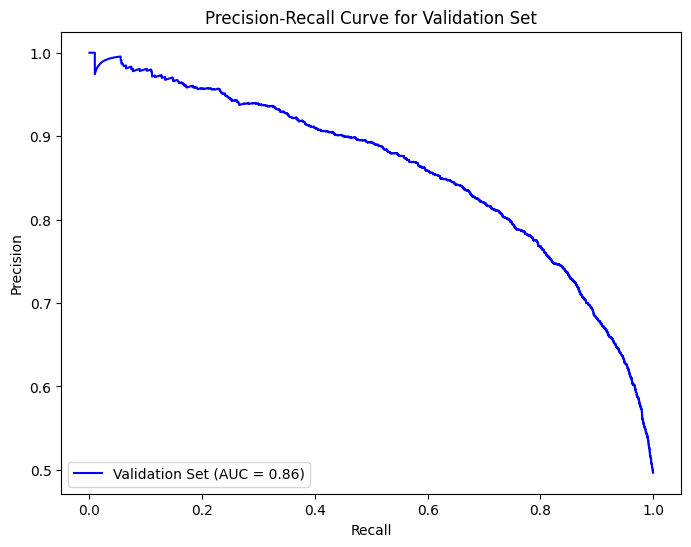

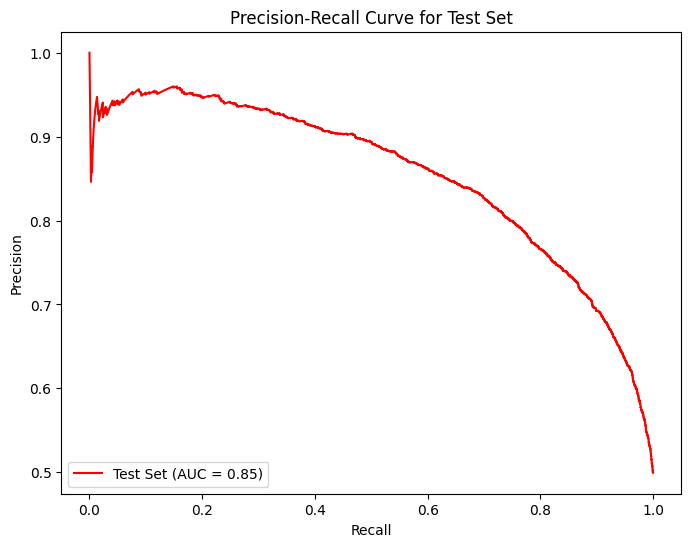

In [ ]:
# Precision-Recall Curve for validation and test set of Model 1

# Predict probabilities on the validation set
y_valid_pred_proba = best_rf_model.predict_proba(X_valid_scaled_1)[:, 1]

# Predict probabilities on the test set
y_test_pred_proba = best_rf_model.predict_proba(X_test_scaled_1)[:, 1]

# Compute precision-recall curve values for validation set
precision_valid, recall_valid, thresholds_valid = precision_recall_curve(y_valid_1, y_valid_pred_proba)

# Compute area under the curve (AUC) for validation set
pr_auc_valid = auc(recall_valid, precision_valid)

# Plot the precision-recall curve for validation set
plt.figure(figsize=(8, 6))
plt.plot(recall_valid, precision_valid, label=f'Validation Set (AUC = {pr_auc_valid:.2f})', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Validation Set')
plt.legend(loc='lower left')
plt.show()

# Compute precision-recall curve values for test set
precision_test, recall_test, thresholds_test = precision_recall_curve(y_test_1, y_test_pred_proba)

# Compute area under the curve (AUC) for test set
pr_auc_test = auc(recall_test, precision_test)

# Plot the precision-recall curve for test set
plt.figure(figsize=(8, 6))
plt.plot(recall_test, precision_test, label=f'Test Set (AUC = {pr_auc_test:.2f})', color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Test Set')
plt.legend(loc='lower left')
plt.show()





In [ ]:
# Impact of threshold adjustment on Precision and Recall metrics of Model 1

def evaluate_model(model, X, y, set_name=""):
    """
    Evaluate the performance of a classification model on a given dataset.

    Parameters:
    - model: The trained classification model.
    - X: The feature matrix of the dataset.
    - y: The true labels of the dataset.
    - set_name: The name of the dataset (e.g., "Train", "Validation", "Test").

    Prints:
    - Accuracy, Precision, Recall, F1 Score, ROC AUC Score, Confusion Matrix.
    """
    # Make predictions
    y_pred = model.predict(X)

    # Convert y to 1D array if it's a DataFrame
    if hasattr(y, 'values'):
        y = y.values.ravel()

    # Calculate and print relevant evaluation metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    roc_auc = roc_auc_score(y, y_pred)
    confusion_mat = confusion_matrix(y, y_pred)

    print(f"{set_name} Set Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("Confusion Matrix:")
    print(confusion_mat)
    print("\n")

# Predict probabilities on the validation set
y_valid_pred_proba = best_rf_model.predict_proba(X_valid_scaled_1)[:, 1]

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_valid_1, y_valid_pred_proba)

# Find the threshold for a desired trade-off (e.g., balance between precision and recall)
desired_precision = 0.85
desired_recall = 0.85

# Find the index of the point on the curve closest to the desired trade-off
closest_point_index = np.argmin(np.abs(precision - desired_precision) + np.abs(recall - desired_recall))

# Get the corresponding threshold
desired_threshold = thresholds[closest_point_index]

# Print the desired threshold
print(f"Desired Threshold: {desired_threshold:.4f}")

# Adjust the decision threshold for the validation set
adjusted_predictions_valid = (y_valid_pred_proba >= desired_threshold).astype(int)

# Now, use the adjusted predictions in your evaluation or downstream tasks for the validation set
evaluate_model(best_rf_model, X_valid_scaled_1, y_valid_1, set_name="Validation with Adjusted Threshold")

# Predict probabilities on the test set
y_test_pred_proba = best_rf_model.predict_proba(X_test_scaled_1)[:, 1]

# Adjust the decision threshold for the test set
adjusted_predictions_test = (y_test_pred_proba >= desired_threshold).astype(int)

# Now, use the adjusted predictions in your evaluation or downstream tasks for the test set
evaluate_model(best_rf_model, X_test_scaled_1, y_test_1, set_name="Test with Adjusted Threshold")



Desired Threshold: 0.4496
Validation with Adjusted Threshold Set Evaluation:
Accuracy: 0.7797
Precision: 0.7804
Recall: 0.7797
F1 Score: 0.7797
ROC AUC: 0.7799
Confusion Matrix:
[[3067  978]
 [ 792 3199]]


Test with Adjusted Threshold Set Evaluation:
Accuracy: 0.7778
Precision: 0.7782
Recall: 0.7778
F1 Score: 0.7777
ROC AUC: 0.7778
Confusion Matrix:
[[3049  974]
 [ 812 3202]]




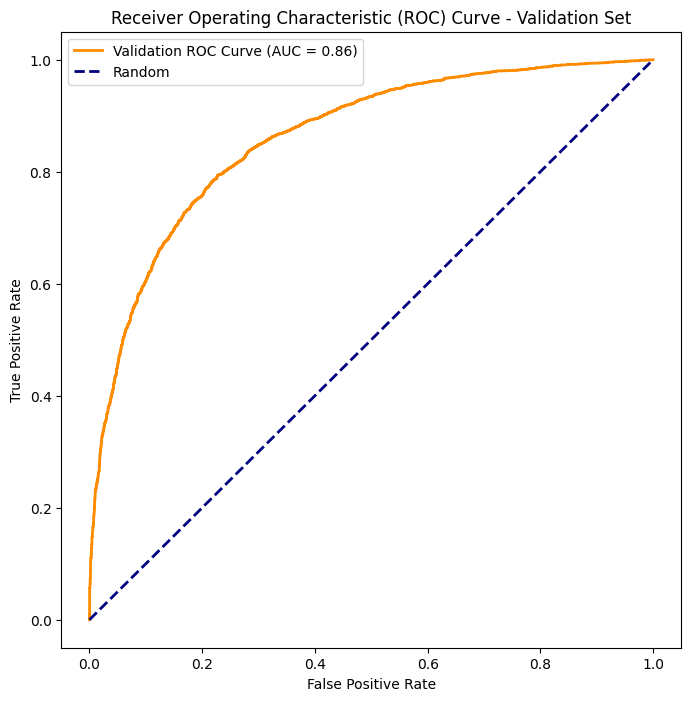

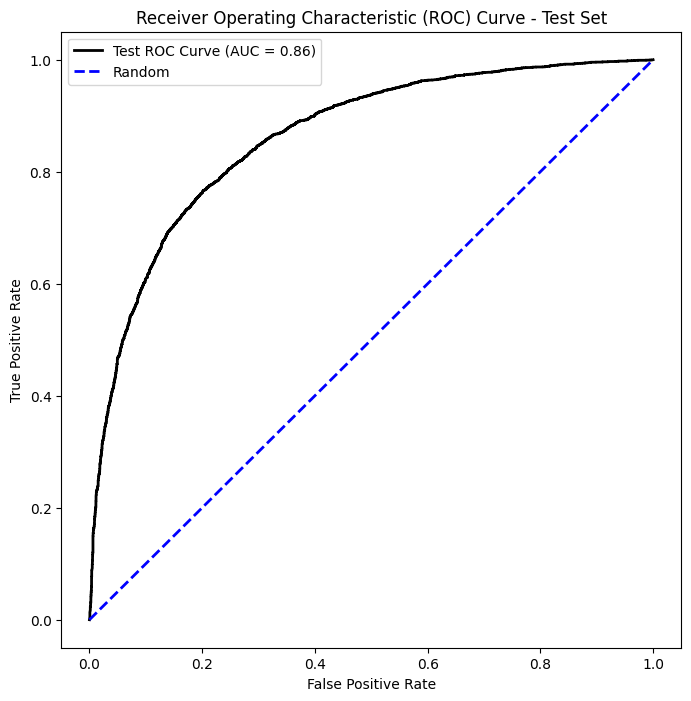

In [ ]:
# ROC Curve on validation and test set of Model 1

# Get probabilities on the validation set
y_valid_pred_proba = best_rf_model.predict_proba(X_valid_scaled_1)[:, 1]
# Get probabilities on the test set
y_test_pred_proba = best_rf_model.predict_proba(X_test_scaled_1)[:, 1]

# Adjust the decision threshold for both validation and test sets
adjusted_threshold = 0.445
adjusted_predictions_valid = (y_valid_pred_proba >= adjusted_threshold).astype(int)
adjusted_predictions_test = (y_test_pred_proba >= adjusted_threshold).astype(int)

# Compute ROC Curve for both validation and test sets
fpr_valid, tpr_valid, _ = roc_curve(y_valid_1, y_valid_pred_proba)
roc_auc_valid = auc(fpr_valid, tpr_valid)

fpr_test, tpr_test, _ = roc_curve(y_test_1, y_test_pred_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC Curves separately
import matplotlib.pyplot as plt

# Plot ROC Curve for Validation set
plt.figure(figsize=(8, 8))
plt.plot(fpr_valid, tpr_valid, color='darkorange', lw=2, label=f'Validation ROC Curve (AUC = {roc_auc_valid:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Validation Set')
plt.legend()
plt.show()

# Plot ROC Curve for Test set
plt.figure(figsize=(8, 8))
plt.plot(fpr_test, tpr_test, color='black', lw=2, label=f'Test ROC Curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Set')
plt.legend()
plt.show()


Total Correctly Classified Instances on Validation Set of model 1: 6266
Total Misclassified Instances on Validation Set of model 1: 1770


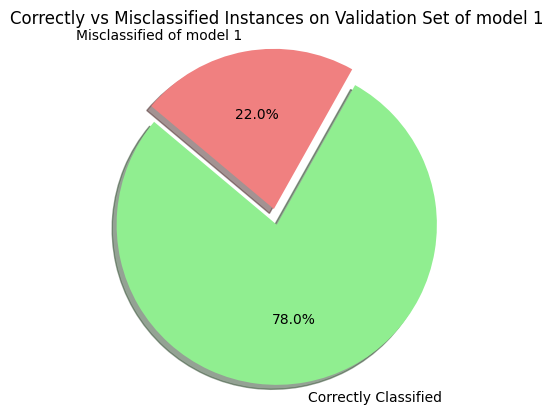

In [ ]:
# Pie chart for analyzing correctly classified and misclassified on validation Set of Model 1

# Confusion matrix of Model 1 on Validation Set
confusion_matrix = np.array([[3067, 978], [792, 3199]])

# Calculate total correctly classified and misclassified instances
correctly_classified = np.trace(confusion_matrix)
misclassified = np.sum(confusion_matrix) - correctly_classified

# Print the results
print("Total Correctly Classified Instances on Validation Set of model 1:", correctly_classified)
print("Total Misclassified Instances on Validation Set of model 1:", misclassified)

# Plot a pie chart
labels = ['Correctly Classified', 'Misclassified of model 1']
sizes = [correctly_classified, misclassified]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # explode the first slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.title('Correctly vs Misclassified Instances on Validation Set of model 1')
plt.show()



Total Correctly Classified Instances on Test Set of model 1: 6251
Total Misclassified Instances on Test Set of model 1: 1786


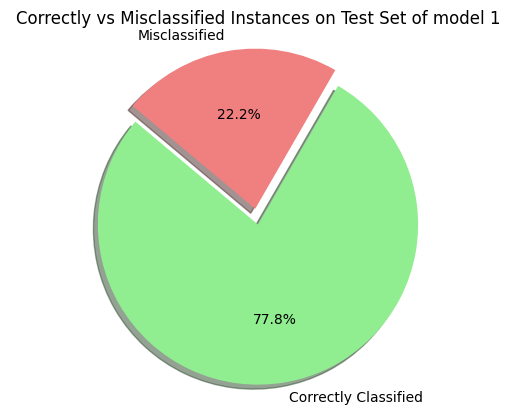

In [ ]:

# Pie chart for analyzing correctly classified and misclassified  on Test Set of Model 1
# Confusion matrix of Model 1 on Test Set
confusion_matrix = np.array([[3049, 974], [812, 3202]])


# Calculate total correctly classified and misclassified instances
correctly_classified = np.trace(confusion_matrix)
misclassified = np.sum(confusion_matrix) - correctly_classified

# Print the results
print("Total Correctly Classified Instances on Test Set of model 1:", correctly_classified)
print("Total Misclassified Instances on Test Set of model 1:", misclassified)

# Plot a pie chart
labels = ['Correctly Classified', 'Misclassified']
sizes = [correctly_classified, misclassified]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # explode the first slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.title('Correctly vs Misclassified Instances on Test Set of model 1')
plt.show()

In [ ]:
#Evaluate Cross-Validation Stability of Model 1
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [5,15, 50],
    'max_depth': [3, 5,10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model on the training data
grid_search.fit(X_train_scaled_1, y_train_1)

# Access cross-validation results
cv_results = grid_search.cv_results_

# Print performance metrics for each fold
for i in range(grid_search.n_splits_):
    print(f"\nResults for Fold {i + 1}:")
    print(f"Mean Test Score: {cv_results[f'mean_test_score'][i]}")
    print(f"Standard Deviation Test Score: {cv_results[f'std_test_score'][i]}")
    print(f"Params: {cv_results['params'][i]}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits

Results for Fold 1:
Mean Test Score: 0.5955884874111883
Standard Deviation Test Score: 0.01104495652288835
Params: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5}

Results for Fold 2:
Mean Test Score: 0.6272105733082985
Standard Deviation Test Score: 0.0034858567050852773
Params: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 15}

Results for Fold 3:
Mean Test Score: 0.623555378773454
Standard Deviation Test Score: 0.0031031403675361936
Params: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Results for Fold 4:
Mean Test Score: 0.5955884874111883
Standard Deviation Test Score: 0.01104495652288835
Params: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 5}

Results for Fold 5:
Mean Test Score: 0.6272105733082985
Standard Deviation Test Score: 0.0034858567050852773
Params: {'max_depth': 3, 'm

**Preping for Model 2**

In [ ]:
#!pip install scikit-learn

Features for Model2

In [ ]:
 #Drop 'success' and 'transaction_fee' columns from the original DataFrame
X_original = df.drop(['success', 'transaction_fee'], axis=1)

# One-hot encode categorical columns: 'country', 'PSP', 'card'
X_original_encoded = pd.get_dummies(X_original, columns=['country', 'PSP', 'card'])

# Identify additional columns in X_original_encoded not present in X_train_1
additional_columns = set(X_original_encoded.columns) - set(X_train_1.columns)
if additional_columns:
    print(f"Additional columns in X_original_encoded: {additional_columns}")

# Identify missing columns in X_original_encoded compared to X_train_1
missing_columns = set(X_train_1.columns) - set(X_original_encoded.columns)
if missing_columns:
    print(f"Missing columns in X_original_encoded: {missing_columns}")

# Keep only columns present in X_train_1 in X_original_encoded
X_original_encoded = X_original_encoded[X_train_1.columns]

# Scale the features using the previously defined 'scaler'
X_original_scaled = scaler.transform(X_original_encoded)

# Predict success probabilities using the trained random forest Model 1
success_probabilities = best_rf_model.predict_proba(X_original_scaled)[:, 1]

# Add the success probabilities as a new column to the original DataFrame
df['success_probabilities'] = success_probabilities

# Display the updated DataFrame
df.head()

,country,amount,success,PSP,3D_secured,card,transaction_fee,day_of_week,minute_of_day,payment_attempts,success_probabilities
0,Austria,6,0,Moneycard,0,Diners,2.0,3,229,1,0.444444
1,Austria,6,0,Simplecard,0,Diners,0.5,3,229,2,0.466667
2,Austria,6,0,UK_Card,0,Diners,1.0,4,302,1,0.447475
3,Austria,6,0,UK_Card,0,Diners,1.0,4,302,2,0.377778
4,Austria,6,0,Simplecard,0,Diners,0.5,4,302,3,0.422222



**Building Baseline Model 2**

In [ ]:
df_2 = df.copy()
# Building Baseline Model 2
# Encode categorical variables using one-hot encoding
df_2_encoded = pd.get_dummies(df_2, columns=['country', 'card'])

# Split the dataset into features (X) and target variable (y)
X = df_2_encoded.drop(['PSP', 'success'], axis=1)
y = df_2_encoded['PSP']

# Split the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create and train a KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

#!pip install scikit-learn
import sklearn.metrics as metrics
# Define a function to evaluate the performance of the model
def evaluate_model(model, X, y, set_name):
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X) if hasattr(model, 'predict_proba') else None

    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='micro')
    recall = recall_score(y, y_pred, average='micro')
    f1 = f1_score(y, y_pred, average='micro')
    roc_auc = roc_auc_score(y, y_proba, multi_class='ovr') if y_proba is not None else None
    conf_matrix = metrics.confusion_matrix(y, y_pred)

    print(f'Model Performance on {set_name} set - {type(model).__name__}:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-Score: {f1:.4f}')
    if roc_auc is not None:
        print(f'AUC-ROC: {roc_auc:.4f}')
    print('Confusion Matrix:')
    print(conf_matrix)
    print('\n')


In [ ]:
# Evaluate the KNN model on the validation set
evaluate_model(knn_model, X_val, y_val, set_name='Validation')

# Evaluate the KNN model on the test set
evaluate_model(knn_model, X_test, y_test, set_name='Test')


Model Performance on Validation set - KNeighborsClassifier:
Accuracy: 0.4360
Precision: 0.4360
Recall: 0.4360
F1-Score: 0.4360
AUC-ROC: 0.5722
Confusion Matrix:
[[  53   81   30  176]
 [  13  139  152  541]
 [   3  114  316  776]
 [  14  342  601 1690]]


Model Performance on Test set - KNeighborsClassifier:
Accuracy: 0.4265
Precision: 0.4265
Recall: 0.4265
F1-Score: 0.4265
AUC-ROC: 0.5691
Confusion Matrix:
[[  39   64   40  167]
 [  10  137  145  521]
 [   3  138  290  774]
 [  10  376  643 1684]]




In [ ]:
# Encode categorical variables using one-hot encoding
df_encoded_2 = pd.get_dummies(df_2, columns=['country', 'card'])

# Print the DataFrame after one-hot encoding
df_encoded_2.head()

,amount,success,PSP,3D_secured,transaction_fee,day_of_week,minute_of_day,payment_attempts,success_probabilities,country_Austria,country_Germany,country_Switzerland,card_Diners,card_Master,card_Visa
0,6,0,Moneycard,0,2.0,3,229,1,0.444444,True,False,False,True,False,False
1,6,0,Simplecard,0,0.5,3,229,2,0.466667,True,False,False,True,False,False
2,6,0,UK_Card,0,1.0,4,302,1,0.447475,True,False,False,True,False,False
3,6,0,UK_Card,0,1.0,4,302,2,0.377778,True,False,False,True,False,False
4,6,0,Simplecard,0,0.5,4,302,3,0.422222,True,False,False,True,False,False


In [ ]:
# Drop the target variables 'PSP' and 'success' from the features
X_2 = df_encoded_2.drop(['PSP', 'success'], axis=1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features using StandardScaler
X_scaled_2 = scaler.fit_transform(X_2)

# Create a DataFrame with scaled features and include the 'PSP' column
df_scaled_2 = pd.DataFrame(X_scaled_2, columns=X_2.columns)
df_scaled_2[['PSP']] = df_encoded_2[['PSP']]

# Print the DataFrame with scaled features
df_scaled_2.head()

,amount,3D_secured,transaction_fee,day_of_week,minute_of_day,payment_attempts,success_probabilities,country_Austria,country_Germany,country_Switzerland,card_Diners,card_Master,card_Visa,PSP
0,-2.039971,-0.55928,0.134244,0.125262,-1.180246,-0.531209,0.027514,2.030637,-1.224087,-0.507923,2.039786,-1.163927,-0.547934,Moneycard
1,-2.039971,-0.55928,-0.692643,0.125262,-1.180246,1.092601,0.317794,2.030637,-1.224087,-0.507923,2.039786,-1.163927,-0.547934,Simplecard
2,-2.039971,-0.55928,-0.417014,0.646728,-1.004572,-0.531209,0.067098,2.030637,-1.224087,-0.507923,2.039786,-1.163927,-0.547934,UK_Card
3,-2.039971,-0.55928,-0.417014,0.646728,-1.004572,1.092601,-0.843326,2.030637,-1.224087,-0.507923,2.039786,-1.163927,-0.547934,UK_Card
4,-2.039971,-0.55928,-0.692643,0.646728,-1.004572,2.716410,-0.262766,2.030637,-1.224087,-0.507923,2.039786,-1.163927,-0.547934,Simplecard


In [ ]:

# Split the scaled DataFrame into features (X_smote_2) and target variable (y_smote_2)
X_smote_2 = df_scaled_2.drop('PSP', axis=1)
y_smote_2 = df_scaled_2['PSP']

# Initialize the SMOTE with a random state
smote_2 = SMOTE(random_state=42)

# Resample the dataset using SMOTE
X_resampled_2, y_resampled_2 = smote_2.fit_resample(X_smote_2, y_smote_2)

# Create a DataFrame with resampled features and include the 'PSP' column
df_2_resampled = pd.DataFrame(X_resampled_2, columns=X_smote_2.columns)
df_2_resampled['PSP'] = y_resampled_2

# Print the resampled DataFrame
df_2_resampled.head()

,amount,3D_secured,transaction_fee,day_of_week,minute_of_day,payment_attempts,success_probabilities,country_Austria,country_Germany,country_Switzerland,card_Diners,card_Master,card_Visa,PSP
0,-2.039971,-0.55928,0.134244,0.125262,-1.180246,-0.531209,0.027514,2.030637,-1.224087,-0.507923,2.039786,-1.163927,-0.547934,Moneycard
1,-2.039971,-0.55928,-0.692643,0.125262,-1.180246,1.092601,0.317794,2.030637,-1.224087,-0.507923,2.039786,-1.163927,-0.547934,Simplecard
2,-2.039971,-0.55928,-0.417014,0.646728,-1.004572,-0.531209,0.067098,2.030637,-1.224087,-0.507923,2.039786,-1.163927,-0.547934,UK_Card
3,-2.039971,-0.55928,-0.417014,0.646728,-1.004572,1.092601,-0.843326,2.030637,-1.224087,-0.507923,2.039786,-1.163927,-0.547934,UK_Card
4,-2.039971,-0.55928,-0.692643,0.646728,-1.004572,2.716410,-0.262766,2.030637,-1.224087,-0.507923,2.039786,-1.163927,-0.547934,Simplecard


In [ ]:
# Split the resampled DataFrame into features (X_2) and target variable (y_2)
X_2 = df_2_resampled.drop('PSP', axis=1)
y_2 = df_2_resampled['PSP']

# Split the dataset into train, validation, and test sets
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)
X_valid_2, X_test_2, y_valid_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, random_state=42)

# Normalize Data
scaler = StandardScaler()
X_train_scaled_2 = scaler.fit_transform(X_train_2)
X_valid_scaled_2 = scaler.transform(X_valid_2)
X_test_scaled_2 = scaler.transform(X_test_2)


In [ ]:
!pip install scikit-learn

# Import necessary libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

def evaluate_model(model, X, y, set_name):
    # Make predictions on the data
    y_pred = model.predict(X)

    # Extract the values of the target variable
    y_values = y.values.ravel()  # Convert DataFrame to 1D array

    # Calculate and print relevant evaluation metrics
    precision = precision_score(y_values, y_pred, average='weighted')
    recall = recall_score(y_values, y_pred, average='weighted')
    f1 = f1_score(y_values, y_pred, average='weighted')

    # For binary classification, set multi_class to 'ovr'
    if len(model.classes_) == 2:
        roc_auc = roc_auc_score(y_values, model.predict_proba(X)[:, 1], average='weighted')
    else:
        roc_auc = roc_auc_score(pd.get_dummies(y_values), model.predict_proba(X), average='weighted', multi_class='ovr')

    accuracy = accuracy_score(y_values, y_pred)

    print(f"{set_name} Set Evaluation:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")

    # Use the imported confusion_matrix function
    print(confusion_matrix(y_values, y_pred))

In [ ]:
# Development of Model 2

# Create a Logistic Regression model with specified parameters
logreg_model = LogisticRegression(random_state=42, C=1)

# Perform cross-validation on the training set
cv_scores = cross_val_score(logreg_model, X_train_scaled_2, y_train_2, scoring='f1_weighted', cv=StratifiedKFold(n_splits=5))

# Print cross-validation scores
print("Cross-Validation Scores of Logistic Regression:")
print(cv_scores)
print(f"Average F1 Weighted Score: {cv_scores.mean():.4f}\n")

# Fit the Logistic Regression model on the training set
logreg_model.fit(X_train_scaled_2, y_train_2)

# Print model performance on the validation set
print("Model Performance on Validation set - Logistic Regression:")
evaluate_model(logreg_model, X_valid_scaled_2, y_valid_2, set_name="Validation")

# Print model performance on the test set
print("Model Performance on Test set - Logistic Regression:")
evaluate_model(logreg_model, X_test_scaled_2, y_test_2, set_name="Test")


Cross-Validation Scores of Logistic Regression:
[0.86047104 0.8536332  0.85627531 0.85740424 0.85747001]
Average F1 Weighted Score: 0.8571

Model Performance on Validation set - Logistic Regression:
Validation Set Evaluation:
Precision: 0.8618
Recall: 0.8579
F1 Score: 0.8571
ROC AUC: 0.9517
Accuracy: 0.8579
Confusion Matrix:
[[2603    5    0    0]
 [ 503 1958    0  159]
 [   0    0 2322  304]
 [   0  533    0 2197]]
Model Performance on Test set - Logistic Regression:
Test Set Evaluation:
Precision: 0.8585
Recall: 0.8542
F1 Score: 0.8536
ROC AUC: 0.9503
Accuracy: 0.8542
Confusion Matrix:
[[2580   10    0    0]
 [ 487 1968    0  166]
 [   0    0 2316  333]
 [   0  547    0 2177]]


In [ ]:

# Create a Random Forest model with specified parameters
rf_model = RandomForestClassifier(random_state=42, n_estimators=45, max_depth=None)

# Perform cross-validation on the training set
cv_scores_rf = cross_val_score(rf_model, X_train_scaled_2, y_train_2, scoring='f1_weighted', cv=StratifiedKFold(n_splits=5))

# Print cross-validation scores
print("Cross-Validation Scores:")
print(cv_scores_rf)
print(f"Average F1 Weighted Score: {cv_scores_rf.mean():.4f}\n")

# Fit the Random Forest model on the training set
rf_model.fit(X_train_scaled_2, y_train_2)

# Print model performance on the validation set
print("Model Performance on Validation set - Random Forest:")
evaluate_model(rf_model, X_valid_scaled_2, y_valid_2, set_name="Validation")

# Print model performance on the test set
print("Model Performance on Test set - Random Forest:")
evaluate_model(rf_model, X_test_scaled_2, y_test_2, set_name="Test")


Cross-Validation Scores:
[0.99385898 0.99433088 0.99557114 0.99362211 0.99509833]
Average F1 Weighted Score: 0.9945

Model Performance on Validation set - Random Forest:
Validation Set Evaluation:
Precision: 0.9949
Recall: 0.9949
F1 Score: 0.9949
ROC AUC: 0.9997
Accuracy: 0.9949
Confusion Matrix:
[[2608    0    0    0]
 [  15 2604    0    1]
 [   0    0 2590   36]
 [   0    0    2 2728]]
Model Performance on Test set - Random Forest:
Test Set Evaluation:
Precision: 0.9955
Recall: 0.9955
F1 Score: 0.9955
ROC AUC: 0.9999
Accuracy: 0.9955
Confusion Matrix:
[[2590    0    0    0]
 [  16 2604    0    1]
 [   0    0 2620   29]
 [   0    0    2 2722]]


In [ ]:
# Create a Random Forest model with specified parameters
GBoostmodel_2 = GradientBoostingClassifier(random_state=42)

# Perform cross-validation on the training set
cv_scores_gb= cross_val_score(GBoostmodel_2 , X_train_scaled_2, y_train_2, scoring='f1_weighted', cv=StratifiedKFold(n_splits=5))

# Print cross-validation scores
print("Cross-Validation Scores:")
print(cv_scores_gb)
print(f"Average F1 Weighted Score: {cv_scores_rf.mean():.4f}\n")

# Fit the Random Forest model on the training set
GBoostmodel_2.fit(X_train_scaled_2, y_train_2)

# Print model performance on the validation set
print("Model Performance on Validation set - GradientBoostingClassifier:")
evaluate_model(GBoostmodel_2 , X_valid_scaled_2, y_valid_2, set_name="Validation")

# Print model performance on the test set
print("Model Performance on Test set -GradientBoostingClassifier:")
evaluate_model(GBoostmodel_2, X_test_scaled_2, y_test_2, set_name="Test")


Cross-Validation Scores:
[0.97276179 0.97335245 0.97619173 0.97293612 0.97281751]
Average F1 Weighted Score: 0.9945

Model Performance on Validation set - GradientBoostingClassifier:
Validation Set Evaluation:
Precision: 0.9756
Recall: 0.9746
F1 Score: 0.9746
ROC AUC: 0.9987
Accuracy: 0.9746
Confusion Matrix:
[[2593   15    0    0]
 [ 113 2507    0    0]
 [   0    0 2486  140]
 [   0    0    1 2729]]
Model Performance on Test set -GradientBoostingClassifier:
Test Set Evaluation:
Precision: 0.9757
Recall: 0.9748
F1 Score: 0.9748
ROC AUC: 0.9987
Accuracy: 0.9748
Confusion Matrix:
[[2574   16    0    0]
 [ 109 2512    0    0]
 [   0    0 2507  142]
 [   0    0    0 2724]]


In [ ]:
# Create a Random Forest model with specified parameters
Tree_2 = DecisionTreeClassifier()

# Perform cross-validation on the training set
cv_scores_tree2 = cross_val_score(Tree_2 , X_train_scaled_2, y_train_2, scoring='f1_weighted', cv=StratifiedKFold(n_splits=5))

# Print cross-validation scores
print("Cross-Validation Scores:")
print(cv_scores_tree2)
print(f"Average F1 Weighted Score: {cv_scores_rf.mean():.4f}\n")

# Fit the Random Forest model on the training set
Tree_2.fit(X_train_scaled_2, y_train_2)

# Print model performance on the validation set
print("Model Performance on Validation set -DecisionTreeClassifier:")
evaluate_model(Tree_2 , X_valid_scaled_2, y_valid_2, set_name="Validation")

# Print model performance on the test set
print("Model Performance on Test set -DecisionTreeClassifier:")
evaluate_model(Tree_2, X_test_scaled_2, y_test_2, set_name="Test")


Cross-Validation Scores:
[0.99226424 0.99179162 0.99368134 0.99226357 0.99415341]
Average F1 Weighted Score: 0.9945

Model Performance on Validation set -DecisionTreeClassifier:
Validation Set Evaluation:
Precision: 0.9937
Recall: 0.9937
F1 Score: 0.9937
ROC AUC: 0.9958
Accuracy: 0.9937
Confusion Matrix:
[[2591   17    0    0]
 [  16 2604    0    0]
 [   0    0 2606   20]
 [   0    0   14 2716]]
Model Performance on Test set -DecisionTreeClassifier:
Test Set Evaluation:
Precision: 0.9942
Recall: 0.9942
F1 Score: 0.9942
ROC AUC: 0.9962
Accuracy: 0.9942
Confusion Matrix:
[[2579   11    0    0]
 [  19 2602    0    0]
 [   0    0 2634   15]
 [   0    0   16 2708]]


In [ ]:

# Create and train Support Vector Machine (SVM) model
svm_model_2 = SVC(kernel='linear', C=1, random_state=42)

# Perform cross-validation on the training set
cv_scores_svm = cross_val_score(svm_model_2 , X_train_scaled_2, y_train_2,  cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:")
print(cv_scores_svm)
print(f"Average F1 Weighted Score: {cv_scores_svm.mean():.4f}\n")

# Fit the Random Forest model on the training set
svm_model_2.fit(X_train_scaled_2, y_train_2)

# Print model performance on the validation set
y_pred = svm_model_2.predict( X_valid_scaled_2)
print(classification_report(y_valid_2 , y_pred, digits=4))
# Print model performance on the test set
y_pred1 = svm_model_2.predict( X_test_scaled_2)
print(classification_report(y_test_2 , y_pred1,  digits=4))



Cross-Validation Scores:
[0.87232786 0.86417858 0.86978859 0.87090297 0.86730054]
Average F1 Weighted Score: 0.8689

              precision    recall  f1-score   support

    Goldcard     0.8253    1.0000    0.9043      2608
   Moneycard     0.7951    0.7893    0.7922      2620
  Simplecard     1.0000    0.8858    0.9394      2626
     UK_Card     0.8799    0.8048    0.8406      2730

    accuracy                         0.8691     10584
   macro avg     0.8751    0.8700    0.8691     10584
weighted avg     0.8752    0.8691    0.8688     10584

              precision    recall  f1-score   support

    Goldcard     0.8283    1.0000    0.9061      2590
   Moneycard     0.7921    0.7951    0.7936      2621
  Simplecard     1.0000    0.8754    0.9336      2649
     UK_Card     0.8684    0.7992    0.8323      2724

    accuracy                         0.8664     10584
   macro avg     0.8722    0.8674    0.8664     10584
weighted avg     0.8726    0.8664    0.8661     10584



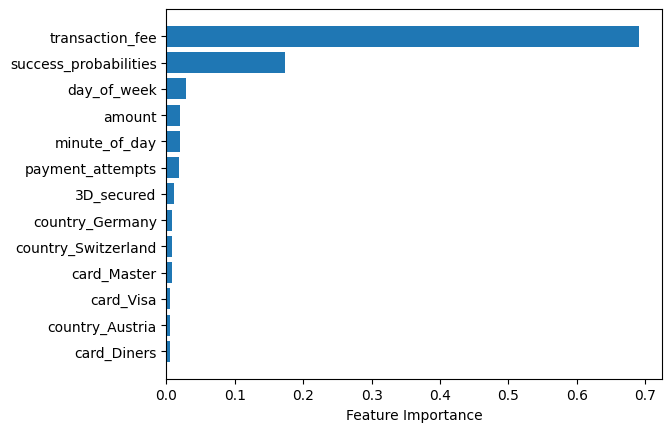

In [ ]:
import matplotlib.pyplot as plt
# Define the feature names
feature_names = ["amount", "3D_secured", "transaction_fee", "day_of_week", "minute_of_day",
                  "payment_attempts", "success_probabilities", "country_Austria", "country_Germany",
                  "country_Switzerland", "card_Diners", "card_Master", "card_Visa", "PSP"]

sort = rf_model.feature_importances_.argsort()

# Use the 'feature_names' variable directly as a list
plt.barh([feature_names[i] for i in sort], rf_model.feature_importances_[sort])

plt.xlabel("Feature Importance")
plt.show()
